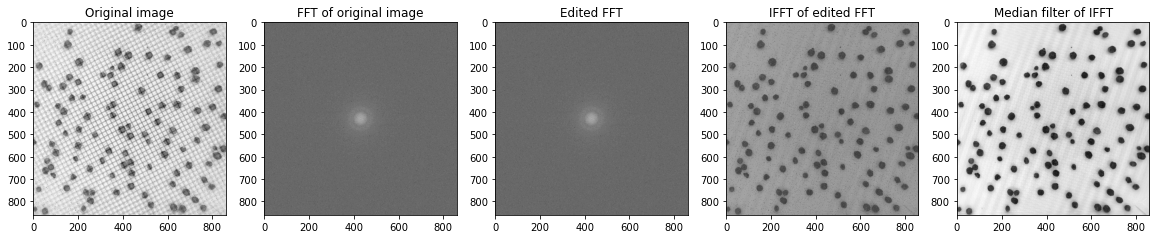

In [64]:
import numpy as np
from scipy import ndimage as ndim
from skimage import morphology, io, filters
import skimage.io
from scipy.ndimage import median_filter
from skimage.morphology.selem import disk
# from skimage import filters
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

plt.rcParams['image.cmap'] = 'gray'  # change default colormap

fig, ax = plt.subplots(ncols=5, figsize=(20, 10))

input_image = skimage.io.imread("./img/input.tif")

input_image_fft = np.fft.fftshift(np.fft.fft2(input_image))
radius = 16
center = 430

input_image_fft_edit = input_image_fft
for x in range(int(np.sqrt(input_image_fft_edit.size))):
    for y in range(int(np.sqrt(input_image_fft_edit.size))):
        if (((x > center + radius or x < center - radius) 
             or (y > center + radius or y < center - radius))):
            if (np.log(abs(input_image_fft_edit[x, y])) > 13.5):
                input_image_fft_edit[x, y] = np.complex128(255)


input_image_ifft = abs(np.fft.ifft2(input_image_fft))

median_img = median_filter(input_image_ifft, 4)


ax[0].title.set_text('Original image')
ax[0].imshow(input_image)
ax[1].title.set_text('FFT of original image')
ax[1].imshow(np.log(abs(input_image_fft)), cmap='gray')
ax[2].title.set_text('Edited FFT')
ax[2].imshow(np.log(abs(input_image_fft_edit)), cmap='gray')
ax[3].title.set_text('IFFT of edited FFT')
ax[3].imshow(input_image_ifft, cmap='gray')
ax[4].title.set_text('Median filter of IFFT')
ax[4].imshow(median_img)


C:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


Threshold locatetd at grey-value: 161.94084964326805


C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


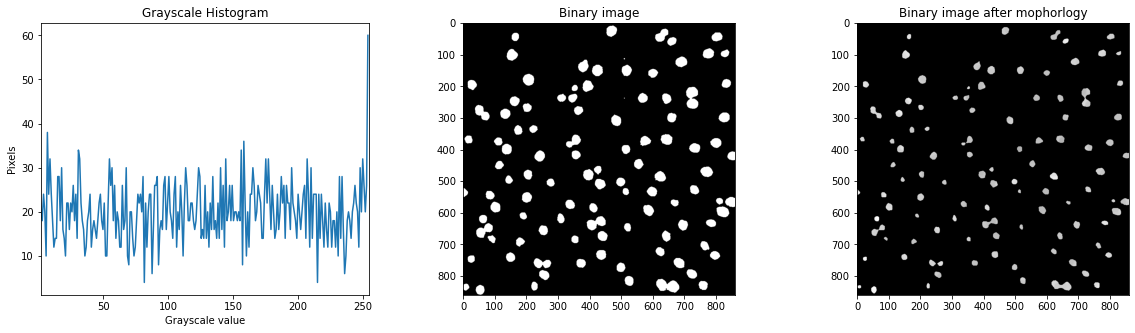

In [65]:
fig, ax = plt.subplots(ncols=3,figsize=(20,5))

histogram, bin_edges = np.histogram(input_image_fft, bins=256, range=(0, 255))

t = filters.threshold_otsu(median_img)
print("Threshold locatetd at grey-value: {}".format(t))

binary_mask = median_img < t

# use the binary_mask to remove the background
masked_img = np.zeros_like(median_img)
masked_img[binary_mask] = median_img[binary_mask]

erosion_radius = 10.5

erosion_img = skimage.morphology.dilation(masked_img, disk(erosion_radius/3))
erosion_img = skimage.morphology.erosion(erosion_img, disk(erosion_radius))
erosion_img = skimage.morphology.dilation(erosion_img, disk(erosion_radius/4))

ax[0].plot(bin_edges[0:-1], histogram)
ax[0].title.set_text('Grayscale Histogram')
ax[0].set_xlabel('Grayscale value')
ax[0].set_ylabel('Pixels')
ax[0].set_xlim(2,255)
ax[1].title.set_text('Binary image')
ax[1].imshow(binary_mask)
ax[2].title.set_text('Binary image after mophorlogy')
ax[2].imshow(erosion_img)

In [66]:
min_d = 5

distance = ndim.distance_transform_edt(erosion_img)
coordinates = peak_local_max(distance, min_distance=min_d)
print("Amount of corns found: {}".format(len(coordinates)))

Amount of corns found: 110
